# COMP2002 - Assessment 2: Machine Learning and Optimisation
## Henry Reid : Student Number - 10867600

### Part 1 - Machine Learning

#### Task 1.1 - Data Preparation

In [1]:
# Load the glass_dataset.csv into this
# The 9 inputs must be converted to a suitable format
# No missing data in the dataset

In [2]:
# glass_dataset
    # X axis
        # RI, Na, Mg, Al, Si, K, Ca, Ba, Fe, Type
    # Y axis
        # 1,2,3,5,6,7

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
# Load the data
data = pd.read_csv("glass_dataset.csv")

# Extract the inputs and targets
inputs = data.values[:, :-1].astype(float)

# 
classes = [1, 2, 3, 5, 6, 7]

# Convert the last column to integers (Type)
targets = [classes.index(cls_int) for cls_int in data.values[:, -1].astype(int)]
targets = np.array(targets)

In [5]:
# Split data into training and testing sets
xtrain, xtest, ttrain, ttest = train_test_split(inputs, targets, test_size=0.2, random_state=0)

In [6]:
# Scale the data 
#scaler = StandardScaler()
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [7]:
# Apply PCA 
pca = PCA(n_components=3)
compressed = pca.fit_transform(xtrain)
xtest_compressed = pca.transform(xtest)

#### Task 1.2 - Classification

In [8]:
# Build a classification tool that can predict new points
    # kNN
    # SVM
# Each of the models you must find the optimal number of neighbours + appropriate kernel shape from linear, polynomial and radial
# Each classifier can provide a prediction for a given input
# For the polynomial kernel -> restrict investigation to degree 2 and 3

# FIND THE BEST PARAMETERS FOR EACH 
    # k-NN -> optimal number of k neighbours, weights and metric
    # SVM -> kernel shape

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

Best K: 3
Best score: 0.6977


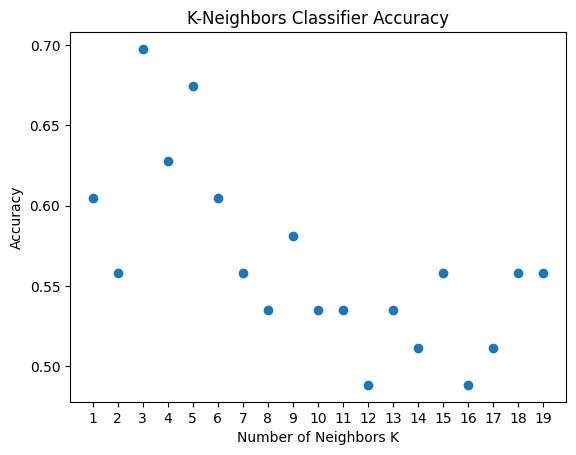

In [10]:
# Finding the optimal number of k
k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(compressed, ttrain) 
    scores.append(knn.score(xtest_compressed, ttest)) 

    best_k = k_range[scores.index(max(scores))]
    best_score = max(scores)

print(f"Best K: {best_k}")
print(f"Best score: {best_score:.4f}")

plt.figure()
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('K-Neighbors Classifier Accuracy')
plt.scatter(k_range, scores)
plt.xticks(k_range)
plt.show()

In [11]:
# Train the classifier
#best_k = 3
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(compressed, ttrain) 

# Make predictions
ytrain = knn.predict(compressed) 
ytest = knn.predict(xtest_compressed) 

trainAccuracy = accuracy_score(ttrain, ytrain)
testAccuracy = accuracy_score(ttest, ytest)

print(f"Train Accuracy: {trainAccuracy}")
print(f"Test Accuracy: {testAccuracy}")

Train Accuracy: 0.8011695906432749
Test Accuracy: 0.6976744186046512


In [12]:
# Comparison against graphs

# Scatter graph
#plt.figure()
#plt.scatter(xtest[:, 0], xtest[:, 1], c=ttest, cmap='viridis', label="Test Data")
#plt.title("k-NN Classification")
#plt.xlabel("PCA Component 1")
#plt.ylabel("PCA Component 2")
#plt.savefig("knn_scatter.pdf")
#plt.show()

# Confusion matrix
#c = confusion_matrix(ttest, ytest)
#plt.imshow(c, cmap="viridis")
#plt.colorbar()
#plt.savefig("confusion_matrix_knn.pdf")
#plt.show()

##### SVM

In [13]:
# Train the svc classifier for a iteration
    # Restrict polynomial kernel to degree 2 and 3
    # Plot the results + print accuracies
# Train and evaluate SVC with different kernels

# Dictionary to store results
results = {}

# Find the appropriate kernel shape from linear, polynomial and radial
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    if kernel == 'poly':
        for degree in [2, 3]:
            # Train the model
            svc = SVC(kernel=kernel, degree=degree, gamma='auto')
            svc.fit(compressed, ttrain)

            # Test the classifier
            ytrain = svc.predict(compressed)
            ytest = svc.predict(xtest_compressed)

            # Assess the accuracy of the classifier
            train_accuracy = accuracy_score(ttrain, ytrain)
            test_accuracy = accuracy_score(ttest, ytest)

            model_name = f"{kernel} (degree={degree})"
            results[model_name] = {
                'train_accuracy': train_accuracy,
                'test_accuracy': test_accuracy,
                'model': svc
            }

            print(f"{model_name} - Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

    else:
        # Train the model
        svc = SVC(kernel=kernel, gamma='auto')
        svc.fit(compressed, ttrain)

        # Test the classifier
        ytrain = svc.predict(compressed)
        ytest = svc.predict(xtest_compressed)

        # Assess the accuracy of the classifier
        train_accuracy = accuracy_score(ttrain, ytrain)
        test_accuracy = accuracy_score(ttest, ytest)

        model_name = f"{kernel}"
        results[model_name] = {
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'model': svc
        }

        print(f"{model_name} - Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

linear - Train Accuracy: 0.5555555555555556, Test Accuracy: 0.32558139534883723
poly (degree=2) - Train Accuracy: 0.3567251461988304, Test Accuracy: 0.20930232558139536
poly (degree=3) - Train Accuracy: 0.3567251461988304, Test Accuracy: 0.20930232558139536
rbf - Train Accuracy: 0.543859649122807, Test Accuracy: 0.37209302325581395


#### Task 1.3 - Assessment of Classification

In [14]:
# Assess the accuracy for each model
    # May use the implementation available to do this
    # Not sufficient to report a single accuracy score
    # Cross validate to report training results -> report these values using a plot
    # Write a summary analysing your results and finding

# Use cross-validation (e.g., k-fold cross-validation)
# Calculate accuract scors for each model configuration
# Create plots to visualise the results
# Write a summary of the results
    # Which model is best?
    # What parameters are best? -> kernel, degree, number of neighbours
    # Patterns 

# Pick the best model from k-NN and SVM and then perform cross-validation
    # Comparing one KNN model to one SVM model


In [15]:
from sklearn.model_selection import KFold, cross_val_score

In [16]:
# Parameters

# KNN parameters
#best_k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

# SVM parameters
svm_classifier = SVC(kernel='rbf', gamma="auto")

# Cross Validation
folds = 7
kf = KFold(n_splits=folds, shuffle=True, random_state=42)

In [17]:
# Perform cross-validation for k-NN
knn_scores = cross_val_score(knn_classifier, compressed, ttrain, cv=kf, scoring='accuracy')

# Perform cross-validation for SVM
svm_scores = cross_val_score(svm_classifier, compressed, ttrain, cv=kf, scoring='accuracy')

# Plot the results
plt.figure()
plt.boxplot([knn_scores, svm_scores], tick_labels=['k-NN Accuracy', 'SVM Accuracy'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Boxplots")
plt.show()

print(f"\nCross-Validation Results:")

# Calculate the averages
knn_accuracy = np.mean(knn_scores)
print(f"k-NN: Mean Accuracy = {knn_accuracy}")
svm_accuracy = np.mean(svm_scores)
print(f"SVM: Mean Accuracy = {svm_accuracy}")

# Calculate maximum and minimum accuracies
knn_max = np.max(knn_scores)
knn_min = np.min(knn_scores)
print(f"k-NN: Max Accuracy = {knn_max}, Min Accuracy = {knn_min}")

svm_max = np.max(svm_scores)
svm_min = np.min(svm_scores)

print(f"RBF: Max Accuracy = {svm_max}, Min Accuracy = {svm_min}")

# Calculate IQR
knn_Q1 = np.percentile(knn_scores, 25)
knn_Q3 = np.percentile(knn_scores, 75)
knn_IQR = knn_Q3 - knn_Q1
print(f"k-NN: IQR = {knn_IQR}")

svm_Q1 = np.percentile(svm_scores, 25)
svm_Q3 = np.percentile(svm_scores, 75)
svm_IQR = svm_Q3 - svm_Q1

print(f"SVM: IQR = {svm_IQR}")    



Cross-Validation Results:
k-NN: Mean Accuracy = 0.6321428571428571
SVM: Mean Accuracy = 0.52
k-NN: Max Accuracy = 0.75, Min Accuracy = 0.48
RBF: Max Accuracy = 0.64, Min Accuracy = 0.375
k-NN: IQR = 0.0691666666666666
SVM: IQR = 0.15583333333333338


##### Conclusion:

Overall k-NN generally performs better predictions on the glass dataset than SVM (RBF) does. As you can see in the boxplots, the mean average of the k-NN model across 7 folds yields a mean accuracy of 0.62, which is higher than RBF model which yields a mean accuracy of 0.52. This means that on average the k-NN model is more accurate at classifying glass samples compared to the RBF model.

On the boxplots, the range can also be calculated (Maximum value - Minimum value). This calculation determines the overall spread of the accuracy scores, in my findings the range difference between the two models is almost non-existent, with RBF have a range of 0.265 and k-NN being 0.27. This indicates that both models have the potential to generate good predictions and bad predictions.

The Inter-Quartile Range is a measure of each models peformance across each fold of the cross-validation. Of the 2 models, the k-NN model has an IQR of 0.069 which suggests that the performance accuracy is a lot more consistent and less sensitive to variations in the testing data. Meanwhile the RBF model has a IQR of 0.156 which suggests that the spread of data covers a wider range, meaning that the overall performance is more sensitive to the data in each fold.

In some of my findings and tests of different variables I have found that the majority of the test scores are mostly dependent on the data preparation / processing section. Where if I were to change the number of PCA components or the random state in the train_test_split then these results would be subject to change drastically. However one component which changes the data completely would be the the scaler aspect, in particular changing the scaler from MinMaxScaler() to StandardScaler(). For instance, using data that has been scaled via the MinMaxScaler() leads to k-NN yielding a higher testing and training accuracy (seen above), meanwhile the SVM model tends to be a show worse results (also seen above). However if i change the scaler to StandardScaler() then the results seem to be more favourable to the SVM RBF model seen (below)

- MinMaxScaler
  - RBF
    - Mean 
    - Min -> 0.375, Max -> 0.64
    - Range -> 0.265
    - IQR -> 0.1558
  - k-NN
    - Min -> 0.48, Max -> 0.75
    - Range -> 0.27
    - IQR -> 0.069
- StandardScaler
  - RBF
    - Mean -> 0.65
    - Min -> 0.416, Max -> 0.8
    - Range -> 0.384
    - IQR -> 0.143
  - k-NN
    - Mean -> 0.625
    - Min -> 0.375, Max -> 0.72
    - Range -> 0.345
    - IQR ->  0.142

### Part 2 - Optimisation

In [18]:
# Problem
    # Schaffer function N.2
        # f(x,y) = 0.5 + (sin(x^2 -y^2)^2 -0.5) / (1 + 0.001(x^2 + y^2))^2
    # Modified Ackley function
        # f(x,y) = -20exp(-0.2 sqrt(0.5(x^2 + y^2))) - exp(0.5(cos(2pi*x) + cos(2pi*y))) + 20 
    # Easom function
        # f(x,y) = -cos(x)cos(y)exp(-((x-pi)^2 + (y-pi)^2))
# Each function should have D = 2 coninuous decision variables that can take any value
    # Recommended to start with random values between -5 and 5 for all three problems

In [19]:
from math import sin, cos, exp, sqrt, pi
import random

In [20]:
# Schaffer function N.2
def schaffer(x, y):
    return 0.5 + (sin(x**2 - y**2)**2 - 0.5) / (1 + 0.001*(x**2 + y**2))**2

In [21]:
# Modified Ackley function
def ackley(x, y):
    return -20*exp(-0.2*sqrt(0.5*(x**2 + y**2))) - exp(0.5*(cos(2*pi*x) + cos(2*pi*y))) + 20

In [22]:
# Easom function
def easom(x, y):
    return -cos(x)*cos(y)*exp(-((x-pi)**2 + (y-pi)**2))

#### Task 2.1 - Generation Of Random Solutions

In [23]:
# Use an Evolutionary algorithm (EA)
    # Compare against randomness
    # Generate 500 random solutions to the problem and plot their fitness values
        # Each solution D = 2 continuous decision variables that can take any value
        # Random values between -5 and 5
        # Problems:
            # Schaffer function N.2 
            # Modified Ackley function
            # Easom function
    # Plot the x and y values and colour the solutions according to their fitness value

In [24]:
# Generate 500 random solutions to the problem
# Each solution D = 2 continuous decision variables that can take any value
def generate_solutions(num_solutions, min_val, max_val):
    solutions = []
    for s in range(num_solutions):
        x = np.random.uniform(min_val, max_val)
        y = np.random.uniform(min_val, max_val)
        solutions.append([x, y])
    return solutions

In [25]:
# Calculate the fitness value of each solution
def calculate_fitness(solutions, function):
    fitness_values = []
    for s in solutions:
        fitness_values.append(function(s[0], s[1]))
    return fitness_values

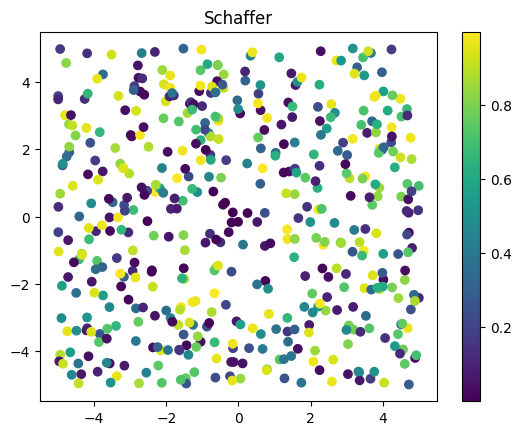

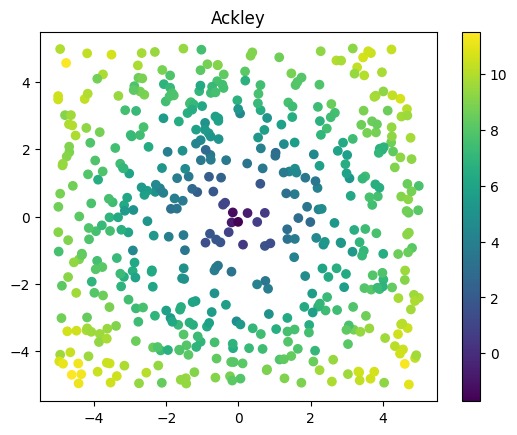

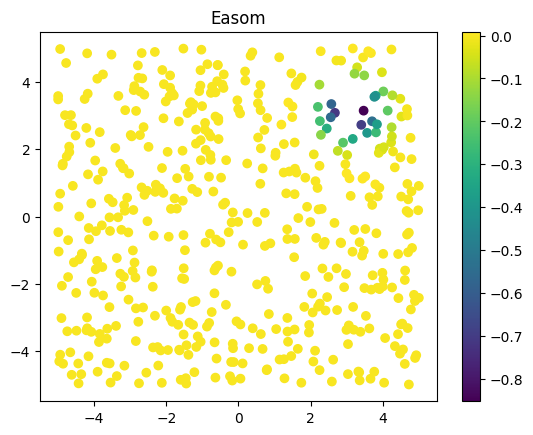

In [26]:
# Plot the fitness value of each solution to each problem
solutions = generate_solutions(500, -5, 5)
schaffer_values = calculate_fitness(solutions, schaffer)
ackley_values = calculate_fitness(solutions, ackley)
easom_values = calculate_fitness(solutions, easom)

plt.figure()
plt.scatter([s[0] for s in solutions], [s[1] for s in solutions], c=schaffer_values, cmap='viridis')
plt.colorbar()
plt.title("Schaffer")
plt.show()

plt.figure()
plt.scatter([s[0] for s in solutions], [s[1] for s in solutions], c=ackley_values, cmap='viridis')
plt.colorbar()
plt.title("Ackley")
plt.show()

plt.figure()
plt.scatter([s[0] for s in solutions], [s[1] for s in solutions], c=easom_values, cmap='viridis')
plt.colorbar()
plt.title("Easom")
plt.show()


#### Task 2.2 - Algorithm Implementation

In [27]:
# Implement a population-based evolutionary algorithm (genetic algorithms)
    # A crossover operator that performs uniform crossover
    # A mutation operator that performs an additive Gaussian mutation
    # A selection operator that combines a generation's parent and child populations and identifies the 
        # parent solutions for the next generation

# Genetic algorithm
    # Generate solutions to each problem -> Schaffer, Ackley, Easom
    # Fitness Evaluation
        # Calculate how good each solution is -> Fitness function
    # Selection -> Tournament selection
        # Choose the best solutions to keep
    # Crossover -> Uniform crossover
        # Combine solutions to generate new ones
    # Mutation -> Additive Guassian Mutation
        # Make small random changes to solutions
    # Replacement
        # Form a new population by replacing some or all of the old population with new solutions
    # Termination
        # Stop the process when a stopping criterion is met

    # Print the final results + visualise the progress of the algorithm

In [28]:
# Comparison function 
def LessThanOrEqual(u, v):
    return u <= v

In [29]:
# Combining the parent population and the offsrping population into a single pool and then selects the best individuals from the combined
# pool to from the next generation's parent population
    # How it works
        # 1. The parent population and the offspring population are combined into a single population
        # 2. The fitness of each individual in the combined population is checked
        # 3. The individuals in the combined population are sorted on their fitness
        # 4. The top individuals are selected to from the next generation's parent population

# Selection operator -> combine parent and child populations and identify the parent solutions for the next generation
def selection_operator(population, fitness_values, num_select, compare):

    # Sort the combined population based on fitness
    sorted_population_indices = sorted(range(len(population)), key=lambda i: fitness_values[i])  

    # Select the top individuals to form the next generation
    new_population = [population[i] for i in sorted_population_indices[:num_select]]
    new_fitness_values = [fitness_values[i] for i in sorted_population_indices[:num_select]]

    return new_population, new_fitness_values

In [30]:
# Unifrom Crossover
    # Type of crossover operator to create new offspring from two parent solutions
    # How it works
        # 1. Two parent solutions are selected
        # 2. For each gene in the offspring, a random decision is made to inherit the value from either parent 1 or parent 2
            # This decision is made with a 50/50 probability 
        # 3. The offspring is constructed by combining the genes inhertied from the two parents

# Crossover operator -> uniform crossover
def crossover_operator(parent1, parent2, crossover_rate=0.5):

    # Create a copy of the parents to create the children for the next generation
    child1 = parent1.copy()
    child2 = parent2.copy()
    
    # For each gene in the offspring, randomly swap genes between the two parents with a probability of 50%
    for i in range(len(parent1)): 
        if random.random() < crossover_rate: # If the random number is less than 0.5 then swap genes between parents
            child1[i], child2[i] = child2[i], child1[i] 
            
    return child1, child2 # Returns changed children

In [31]:
# Additive Gaussian Mutation
    # Introduce random changes in the offspring's genes
    # How it works
        # 1. A mutation rate is defined, which determines the probability of a gene being mutated
        # 2. For each gene in the offspring, a random number is generated
            # If the random number is less than the mutation rate -> gene is mutated
        # 3. A random value is drawn from a Gaussian distribution with a mean of 0 and a specified standard deviation 
        # 4. The random value is added to the exisitng gene value

# Mutation operator 
def mutation_operator(solution, mutation_rate=0.1, sigma=0.1):

    # Create a copy of the solution to apply mutations
    mutated = solution.copy()
    
    # For each gene in the solution, randomly mutate with a probability of 0.1
    for i in range(len(solution)):
        if random.random() < mutation_rate: # If the random number is less than the mutation rate 
            mutated[i] += random.gauss(0, sigma) # Add a random value from a Gaussian distribution with mean 0 and standard deviation sigma
            
    # Returns the mutated solution
    return mutated

#### Task 2.3 - Visualisation Of Results

In [32]:
# Modify optimiser to record the average fitness at each generation
# After the optimiser has run
    # Produce a plot showing the change in average fitness over the runtime of the algorithm

# Visualization code must be seperate from the optimiser 

In [33]:
# Peforms one iteration of evolution 
def evolve(population, fitness_values, func, mutation, crossover, compare, A):
    
    # Generate offspring through crossover
    offspring = []
    for i in range(0, len(population), 2):
        parent1 = population[i % len(population)]
        parent2 = population[(i + 1) % len(population)]
        child1, child2 = crossover(parent1, parent2)
        offspring.append(child1)
        offspring.append(child2)
    
    # Apply mutation to offspring
    mutated_offspring = [mutation(child) for child in offspring]
    
    # Evaluate fitness of offspring
    child_fitness = calculate_fitness(mutated_offspring, func)
    
    # Combine parents and offspring
    combined_population = population + mutated_offspring
    combined_fitness = fitness_values + child_fitness
    
    # Select the best solutions for the next generation
    new_population, new_fitness_values = selection_operator(combined_population, combined_fitness, len(population), compare)
    
    # Record average fitness in archive
    average_fitness = sum(new_fitness_values) / len(new_fitness_values)
    A.append(average_fitness)
    
    return new_population, new_fitness_values, A


In [34]:
# Runs optimisation process
def optimise(pop_size, min_val, max_val, func, selection, mutation, crossover, compare, ngens):

    # Generate random initial population
    population = generate_solutions(pop_size, min_val, max_val)

    # Prints the intial first population before selection, crossover, mutation etc
    #print(population[0])

    # Evaluate initial population
    fitness_values = calculate_fitness(population, func)

    # Archive to store average fitness values
    archive = []

    # Main evolutionary loop: selection, crossover, mutation, and replacement
    for gen in range(ngens):
        population, fitness_values, archive = evolve(population, fitness_values, func, mutation, crossover, compare, archive) 

    # Final population and fitness values
    print(f"For: {func}")
    print(f"Top Population: {population[-1]}")
    print(f"Top Fitness values: {fitness_values[-1]}")

    return population, fitness_values, archive

For: <function schaffer at 0x000001D69812D940>
Top Population: [-8.135611673831496e-05, -3.0447364978349682e-05]
Top Fitness values: 7.546019364923495e-12


For: <function ackley at 0x000001D69812DC60>
Top Population: [2.2157490451174707e-05, -1.281740938543878e-05]
Top Fitness values: -2.7182094098858514


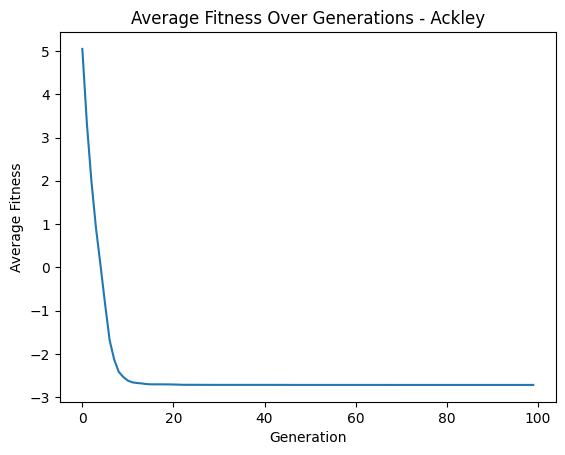

For: <function easom at 0x000001D69812DEE0>
Top Population: [3.14158673765154, 3.1416461732620973]
Top Fitness values: -0.9999999956509695


In [35]:
# Running the optimiser
population, fitness_values, archive = optimise(500, -5, 5, schaffer, selection_operator, mutation_operator, crossover_operator, LessThanOrEqual, 100)
plt.plot(archive)
plt.xlabel('Generation')
plt.ylabel('Average Fitness')
plt.title('Average Fitness Over Generations - Schaffer')
plt.show()

population, fitness_values, archive = optimise(500, -5, 5, ackley, selection_operator, mutation_operator, crossover_operator, LessThanOrEqual, 100)
plt.plot(archive)
plt.xlabel('Generation')
plt.ylabel('Average Fitness')
plt.title('Average Fitness Over Generations - Ackley')
plt.show()

population, fitness_values, archive = optimise(500, -5, 5, easom, selection_operator, mutation_operator, crossover_operator, LessThanOrEqual, 100)
plt.plot(archive)
plt.xlabel('Generation')
plt.ylabel('Average Fitness')
plt.title('Average Fitness Over Generations - easom')
plt.show()